In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
%matplotlib inline

dataset = pd.read_csv('../input/xAPI-Edu-Data.csv')

In [2]:
dataset.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
labelEncoder = LabelEncoder()
dataset['Class'] = labelEncoder.fit_transform(dataset['Class'])
# 0 - High,1 - Low, 2 - Med

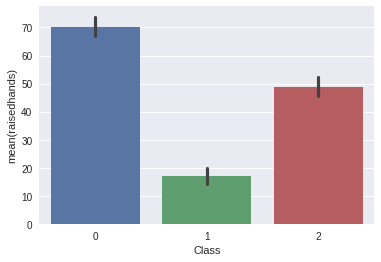

In [4]:
sns.barplot(x='Class',y='raisedhands',data=dataset)
# More raised hands seems directly related to Class

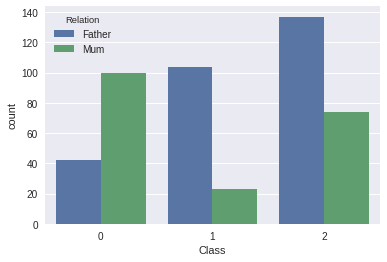

In [5]:
sns.countplot(x='Class',hue='Relation',data=dataset)
# 'Class' seems to be more related to moms so we will keep Moms here

In [6]:
relation_data = pd.get_dummies(dataset['Relation'])
dataset = pd.concat([dataset,relation_data],axis=1)
# Now drop Relation and Father column
dataset.drop(['Relation','Father'],axis=1,inplace=True)

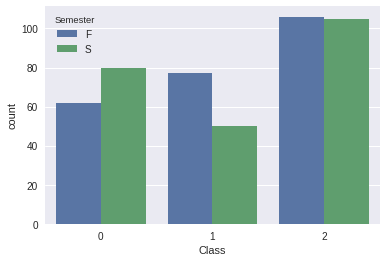

In [7]:
# Semester vs Class
sns.countplot(x='Class',hue='Semester',data=dataset)

In [8]:
# Second semester seems more related to Class
semester_data = pd.get_dummies(dataset['Semester'])
dataset = pd.concat([dataset,semester_data],axis=1)
dataset.drop(['Semester','F'],axis=1,inplace=True)

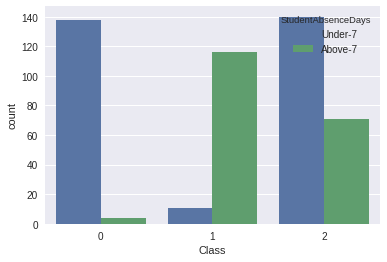

In [9]:
# Student absence days
sns.countplot(x='Class',hue='StudentAbsenceDays',data=dataset)

In [10]:
# Above-7 seems more promising then Under-7
absence_data = pd.get_dummies(dataset['StudentAbsenceDays'])
dataset = pd.concat([dataset,absence_data],axis=1)
dataset.drop(['StudentAbsenceDays','Under-7'],axis=1,inplace=True)

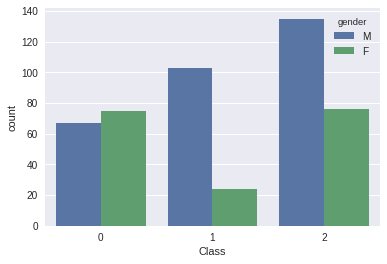

In [11]:
# Gender
sns.countplot(x='Class',hue='gender',data=dataset)

In [12]:
gender_data = pd.get_dummies(dataset['gender'])
dataset = pd.concat([dataset,gender_data],axis=1)
dataset.drop(['gender','M'],axis=1,inplace=True)

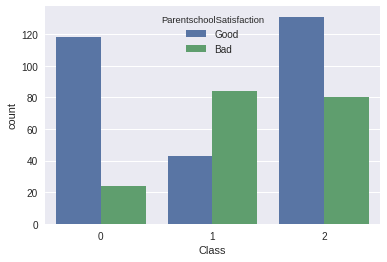

In [13]:
# Parent school satisfaction
sns.countplot(x='Class',hue='ParentschoolSatisfaction',data=dataset)

In [14]:
# Keeping 'Bad'
satisfac_data = pd.get_dummies(dataset['ParentschoolSatisfaction'])
dataset = pd.concat([dataset,satisfac_data],axis=1)
dataset.drop(['ParentschoolSatisfaction','Good'],axis=1,inplace=True)

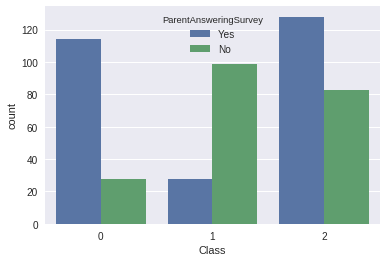

In [15]:
# Parents answering survey
sns.countplot(x='Class',hue='ParentAnsweringSurvey',data=dataset)

In [16]:
# Seems like Class = Low student parents are not answering questions
# Keeping 'No'
survey_data = pd.get_dummies(dataset['ParentAnsweringSurvey'])
dataset = pd.concat([dataset,survey_data],axis=1)
dataset.drop(['ParentAnsweringSurvey','Yes'],axis=1,inplace=True)

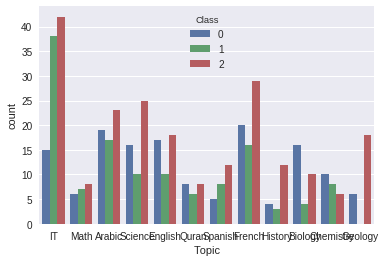

In [17]:
# Subject
sns.countplot(x='Topic',hue='Class',data=dataset)

In [18]:
topic_data = pd.get_dummies(dataset['Topic'],drop_first=True)
dataset = pd.concat([dataset,topic_data],axis=1)
dataset.drop(['Topic'],axis=1,inplace=True)

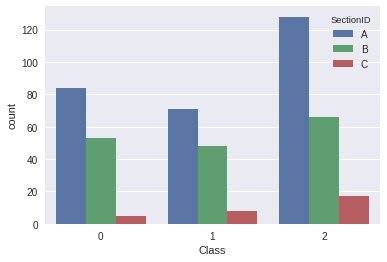

In [19]:
# Section
sns.countplot(x='Class',hue='SectionID',data=dataset)

In [20]:
section_data = pd.get_dummies(dataset['SectionID'])
dataset = pd.concat([dataset,section_data],axis=1)
dataset.drop(['SectionID','C'],axis=1,inplace=True)

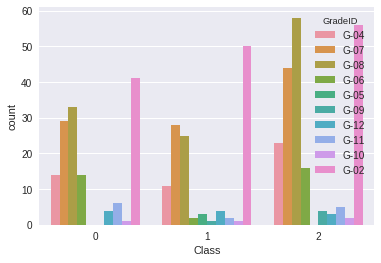

In [21]:
sns.countplot(x='Class',hue='GradeID',data=dataset)

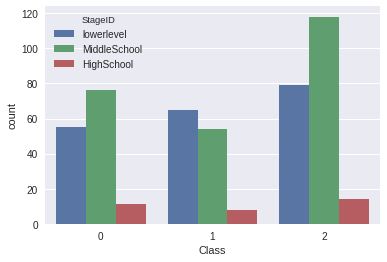

In [22]:
sns.countplot(x='Class',hue='StageID',data=dataset)

In [23]:
stage_data = pd.get_dummies(dataset['StageID'])
dataset = pd.concat([dataset,stage_data],axis=1)
dataset.drop(['StageID','HighSchool'],axis=1,inplace=True)

In [24]:
dataset.drop(['GradeID','PlaceofBirth'],axis=1,inplace=True)

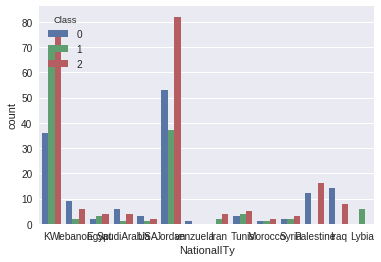

In [25]:
sns.countplot(x='NationalITy',hue='Class',data=dataset)

In [26]:
dataset.drop(['NationalITy'],axis=1,inplace=True)

In [27]:
dataset.rename(columns={'S': 'Second_sem', 'F': 'Female','No':'NoSurvey','Bad':'BadSatisfaction'}, inplace=True)

In [28]:
# Now lets seperate input and output
X = dataset.drop('Class',axis=1)
y = dataset['Class']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
X_test[0]

array([-0.54110325, -0.44384875, -0.5836626 ,  0.8213985 , -0.83164293,
       -0.95417386, -0.81826965,  1.24219417, -0.84515425, -0.92955778,
       -0.24652278, -0.24052285, -0.34573621, -0.38245086, -0.21522436,
       -0.20851441,  1.98067588, -0.19451951, -0.20851441, -0.34099717,
       -0.24052285,  0.84969   , -0.74475222,  0.98963703, -0.84515425])

In [32]:
from sklearn.svm import SVC
svc = SVC(C=100,kernel='rbf',gamma=0.1)
svc.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
svc.score(X_train,y_train)

0.99479166666666663

In [34]:
svc.score(X_test,y_test)

0.75

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
dtc.score(X_test,y_test)

0.71875

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 150)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
rfc.score(X_test,y_test)

0.76041666666666663